In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('911.csv')

In [3]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
data.columns = ['latitude', 'longitude', 'description', 'zipcode', 'title', 'timestamp'
          , 'township', 'address', 'e']
data.head()

,latitude,longitude,description,zipcode,title,timestamp,township,address,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
data.drop('e', axis=1, inplace= True)
data.head()

,latitude,longitude,description,zipcode,title,timestamp,township,address
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 8 columns):
latitude       423909 non-null float64
longitude      423909 non-null float64
description    423909 non-null object
zipcode        371780 non-null float64
title          423909 non-null object
timestamp      423909 non-null object
township       423750 non-null object
address        423909 non-null object
dtypes: float64(3), object(5)
memory usage: 25.9+ MB


#### We can see from the data above, this dataset have missing values 
**Let's check it out**

In [7]:
data.isna().sum()

latitude           0
longitude          0
description        0
zipcode        52129
title              0
timestamp          0
township         159
address            0
dtype: int64

 **What are the top 5 zipcodes for 911 calls?**

In [8]:
data['zipcode'].value_counts().head()

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zipcode, dtype: int64

#### **What are the top 5 township for 911 calls?**

In [9]:
data['township'].value_counts()

LOWER MERION     36441
ABINGTON         25835
NORRISTOWN       23883
UPPER MERION     22694
CHELTENHAM       19629
                 ...  
HATFIELD BORO      865
BRYN ATHYN         835
GREEN LANE         259
PHILA COUNTY       172
LEHIGH COUNTY       95
Name: township, Length: 68, dtype: int64

In [10]:
data['title'].nunique()

141

#### Creating Feature From Title Column and then check the most common reason happened

In [11]:
data['reason_type'] = data['title'].apply(lambda title: title.split(':')[0])

In [12]:
print(data['reason_type'].value_counts())
print('')
print(data['reason_type'].nunique())

EMS        208676
Traffic    151458
Fire        63775
Name: reason_type, dtype: int64

3


In [13]:
data['reason']= data['title'].apply(lambda title: title.split(':')[1].replace(' -',''))

In [14]:
print(data['reason'].value_counts().head())
num=data['reason'].nunique()
f'There are {num} type of reasons'

 VEHICLE ACCIDENT         122482
 DISABLED VEHICLE          31877
 FIRE ALARM                24459
 FALL VICTIM               21258
 RESPIRATORY EMERGENCY     21159
Name: reason, dtype: int64


'There are 86 type of reasons'

<BarContainer object of 10 artists>

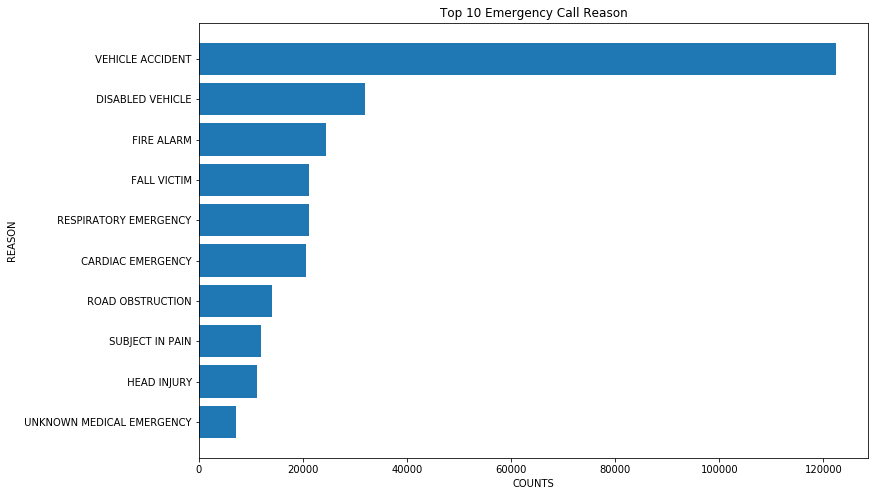

In [15]:
df = data['reason'].value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(df.index)
y = list(df.values)

plt.title('Top 10 Emergency Call Reason')
plt.ylabel('REASON')
plt.xlabel('COUNTS')

x.reverse()
y.reverse()

plt.barh(x,y)


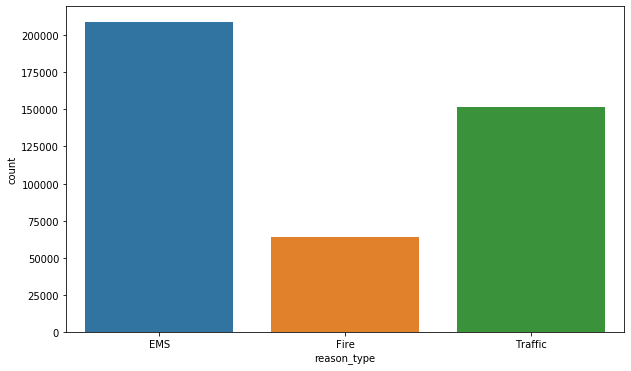

In [16]:
plt.figure(figsize=(10,6))
           
sns.countplot(x='reason_type', data=data)

**Create new feature of station number**

In [17]:
data['station']= data['description'].str.split('Station',expand=True)[1].str.split(';',expand=True)[0]
data.head(3)

,latitude,longitude,description,zipcode,title,timestamp,township,address,reason_type,reason,station
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,332
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,345
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,:STA27


**Checking Most Called Station**

In [18]:
data['station'].str.replace(':','').value_counts().head(10)

 308A    15944
 329     14273
 313     13058
 381     10187
 317      9978
 345      9174
 308      8497
 351      7835
 345B     7658
 382      7055
Name: station, dtype: int64

<BarContainer object of 10 artists>

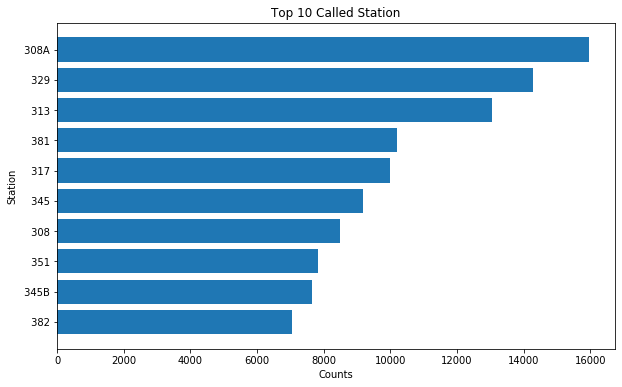

In [19]:
station = data['station'].str.replace(':','').value_counts().head(10)
plt.figure(figsize = (10,6))
y = list(station.values)
x = list(station.index)

x.reverse()
y.reverse()

plt.xlabel('Counts')
plt.ylabel('Station')
plt.title('Top 10 Called Station')

plt.barh(x,y)

### Exploring Timestamp Data

Change timestamp "String" type data to "DateTime"

In [20]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['timestamp']

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
423904   2018-11-16 08:54:08
423905   2018-11-16 08:53:32
423906   2018-11-16 08:54:19
423907   2018-11-16 08:51:48
423908   2018-11-16 08:46:25
Name: timestamp, Length: 423909, dtype: datetime64[ns]

**Creating new features from timestamp column**

In [75]:
data['hour'] = data['timestamp'].apply(lambda time: time.hour)
data['month'] = data['timestamp'].apply(lambda time: time.month)
data['day of week'] = data['timestamp'].apply(lambda time: time.dayofweek)
data['date'] = data['timestamp'].apply(lambda time: time.date())
data.head(1)

,latitude,longitude,description,zipcode,title,timestamp,township,address,reason_type,reason,station,hour,month,day of week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,332,17,12,3,2015-12-10


**Notice integer number on day of week column**

We're gonna using map() to map the actual string of day of week

In [22]:
daymap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [23]:
data['day of week'] = data['day of week'].map(daymap)

In [25]:
data.head(1)

,latitude,longitude,description,zipcode,title,timestamp,township,address,reason_type,reason,station,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,332,17,12,Thu


**Let's check emergency calls Reason Type count based on Day of Week**

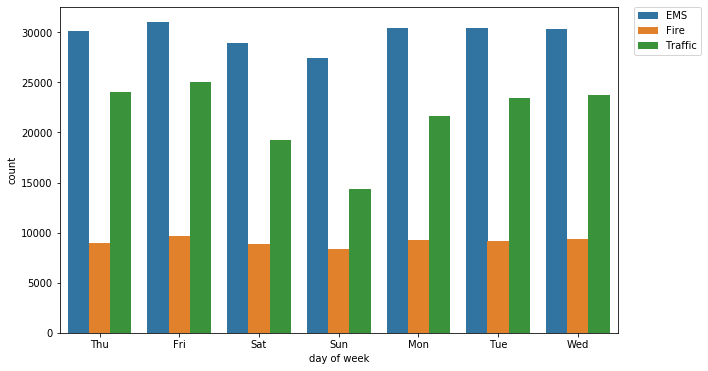

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x='day of week', data=data, hue='reason_type')
plt.legend(bbox_to_anchor=(1.15, 1), loc=1, borderaxespad=0.)

**Let's check emergency calls Reason Type count based on Month**

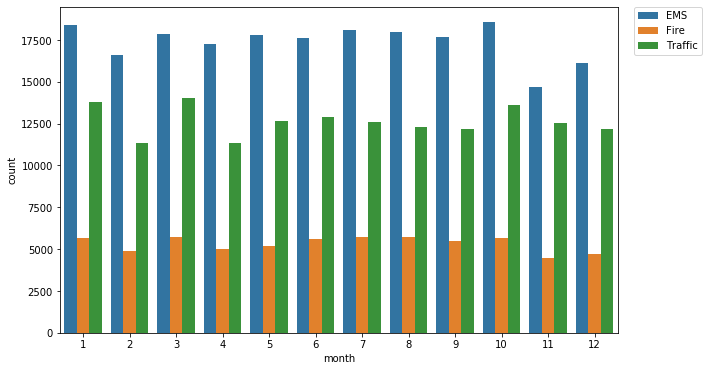

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x='month', data=data, hue='reason_type')
plt.legend(bbox_to_anchor=(1.15, 1), loc=1, borderaxespad=0.)#relocate legend

**Let's check emergency calls trend from month to month**

In [42]:
Month = data.groupby('month').count()
Month

,latitude,longitude,description,zipcode,title,timestamp,township,address,reason_type,reason,station,hour,day of week
month,,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,24040,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,21481,32828,32828
3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,23635,37666,37666
4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,22238,33583,33583
5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,22987,35644,35644
6,36171,36171,36171,31501,36171,36171,36152,36171,36171,36171,23262,36171,36171
7,36405,36405,36405,31863,36405,36405,36391,36405,36405,36405,23821,36405,36405
8,35972,35972,35972,31512,35972,35972,35957,35972,35972,35972,23682,35972,35972
9,35339,35339,35339,30772,35339,35339,35325,35339,35339,35339,23131,35339,35339


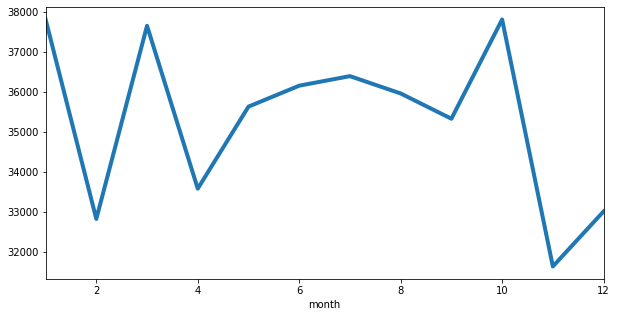

In [55]:
plt.figure(figsize=(10,5))
Month['township'].plot(linewidth = 4)

<Figure size 720x360 with 0 Axes>

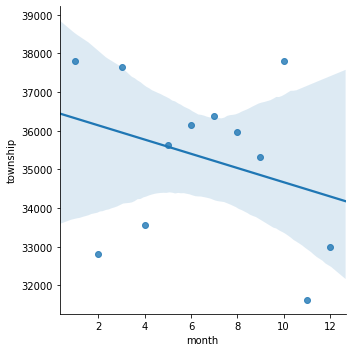

In [62]:
sns.lmplot(x='month',y='township',data=Month.reset_index())

**Let's do something with date column to create calls frequency**

In [86]:
Date = data.groupby('date').count()


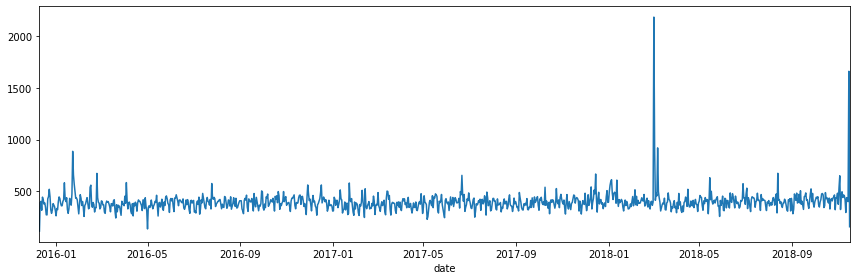

In [115]:
plt.figure(figsize=(12,4))
           
Date['township'].plot()
plt.tight_layout()

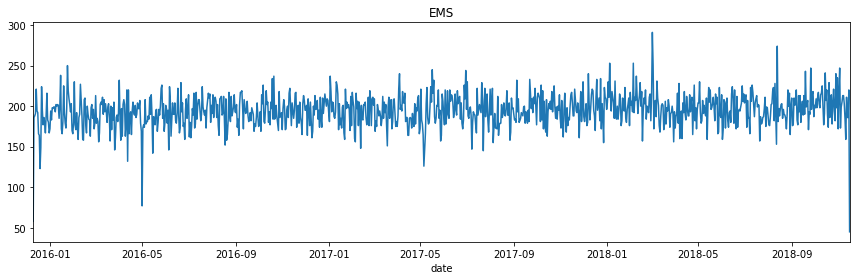

In [112]:
plt.figure(figsize=(12,4))

data[data['reason_type']=='EMS'].groupby('date').count()['township'].plot()
plt.title('EMS')
plt.tight_layout()

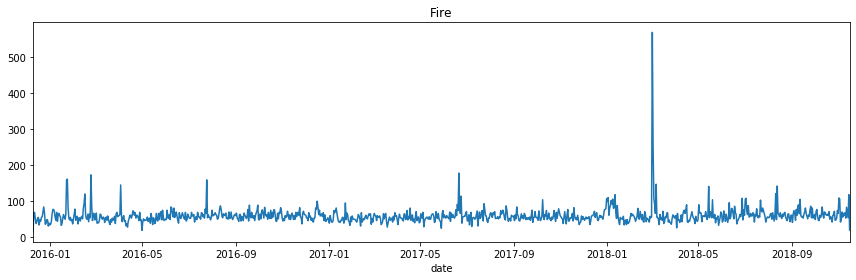

In [113]:
plt.figure(figsize=(12,4))

data[data['reason_type']=='Fire'].groupby('date').count()['township'].plot()
plt.title('Fire')
plt.tight_layout()

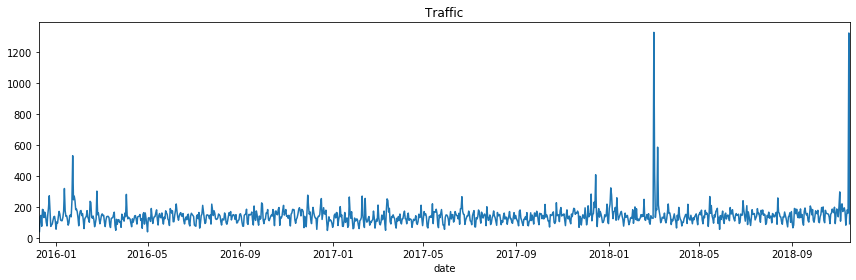

In [114]:
plt.figure(figsize=(12,4))

data[data['reason_type']=='Traffic'].groupby('date').count()['township'].plot()
plt.title('Traffic')
plt.tight_layout()